# Newton-Raphson Method: Root Finding in Engineering

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/WCC-Engineering/ENGR240/blob/main/Class%20Demos%20and%20Activities/Week%203/newton_raphson_demo.ipynb)

## Introduction

The Newton-Raphson method is a powerful numerical technique for finding the roots of nonlinear equations - a common task in many engineering problems.

## Learning Objectives
- Understand the mathematical principles behind the Newton-Raphson method
- Implement the algorithm in Python
- Apply the method to an engineering problem
- Visualize the iterative convergence process

## Mathematical Background

### Newton-Raphson Method: Core Concept

The Newton-Raphson method iteratively improves an estimate of a function's root using the following formula:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

Where:
- $x_{n+1}$ is the next approximation
- $x_n$ is the current approximation
- $f(x_n)$ is the function value at the current approximation
- $f'(x_n)$ is the derivative of the function at the current approximation

### Geometric Interpretation

Geometrically, the method finds the x-intercept of the tangent line at each iteration:

1. Start with initial guess $x_0$
2. Draw the tangent line at point $(x_0, f(x_0))$
3. Find where this tangent line crosses the x-axis - this is $x_1$
4. Repeat until convergence

### Convergence Criteria

The algorithm stops when the relative approximate error is less than a specified tolerance:

$$\left|\frac{x_{n+1} - x_n}{x_{n+1}}\right| \times 100\% < \varepsilon_s$$

## Engineering Application: Beam Analysis

In structural engineering, determining the deflection of a loaded beam often requires solving a nonlinear equation.

For our example, we'll consider a simplified equation derived from beam theory that determines a critical point on the beam:

$$f(x) = x^3 - 3x^2 + 2x - 1 = 0$$

Where x represents a normalized position along the beam, and the root gives us the position of maximum deflection.

## Python Implementation

### The Newton-Raphson Algorithm

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def newton_raphson(fun, dfdx, x0, es=1e-6, max_iter=50, verbose=False):
    """
    Find the root of a function using the Newton-Raphson method.

    Args:
        fun (callable): Function to find root of
        dfdx (callable): Derivative of the function
        x0 (float): Initial guess
        es (float): Stopping criterion (relative error in percent)
        max_iter (int): Maximum iterations
        verbose (bool): Print iteration details

    Returns:
        tuple: (xroot, ea, iter, x_history)
    """
    xroot = x0
    ea = 100  # Initialize error to 100%

    # Store iteration history for visualization
    x_history = [xroot]
    ea_history = []

    if verbose:
        print(f"{'Iter':^6}{'x_n':^12}{'f(x_n)':^12}{'df(x_n)':^12}{'x_n+1':^12}{'Error (%)':^12}")
        print("-" * 66)

    for iter in range(max_iter):
        # Calculate function and derivative values
        fx = fun(xroot)
        dfx = dfdx(xroot)

        if dfx == 0:
            raise ValueError(f"Derivative is zero at x = {xroot}")

        # Newton-Raphson formula
        xroot_old = xroot
        xroot = xroot - fx/dfx

        # Calculate approximate relative error
        if xroot != 0:
            ea = abs((xroot - xroot_old) / xroot) * 100
        else:
            ea = abs(xroot - xroot_old) * 100

        # Store history
        x_history.append(xroot)
        ea_history.append(ea)

        if verbose:
            print(f"{iter:^6}{xroot_old:^12.6f}{fx:^12.6f}{dfx:^12.6f}{xroot:^12.6f}{ea:^12.6f}")

        # Check for convergence
        if ea <= es:
            break

    if verbose:
        print("-" * 66)
        print(f"Root found at x = {xroot:.6f} after {iter+1} iterations")
        print(f"Function value at root: f({xroot:.6f}) = {fun(xroot):.6e}")

    return xroot, ea, iter + 1, x_history, ea_history

# Define our beam deflection problem
def beam_equation(x):
    """Simplified beam equation"""
    return x**3 - 3*x**2 + 2*x - 1

def beam_derivative(x):
    """Derivative of beam equation"""
    return 3*x**2 - 6*x + 2

# Run Newton-Raphson with a starting guess
x0 = 2.0
root, error, iterations, x_history, ea_history = newton_raphson(
    beam_equation, beam_derivative, x0, verbose=True
)

 Iter     x_n        f(x_n)     df(x_n)      x_n+1     Error (%)  
------------------------------------------------------------------
  0     2.000000   -1.000000    2.000000    2.500000   20.000000  
  1     2.500000    0.875000    5.750000    2.347826    6.481481  
  2     2.347826    0.100682    4.449905    2.325200    0.973064  
  3     2.325200    0.002058    4.268468    2.324718    0.020743  
  4     2.324718    0.000001    4.264635    2.324718    0.000009  
  5     2.324718    0.000000    4.264633    2.324718    0.000000  
------------------------------------------------------------------
Root found at x = 2.324718 after 6 iterations
Function value at root: f(2.324718) = -8.881784e-16


## Visualizing the Method

Let's visualize how the Newton-Raphson method converges to the root:

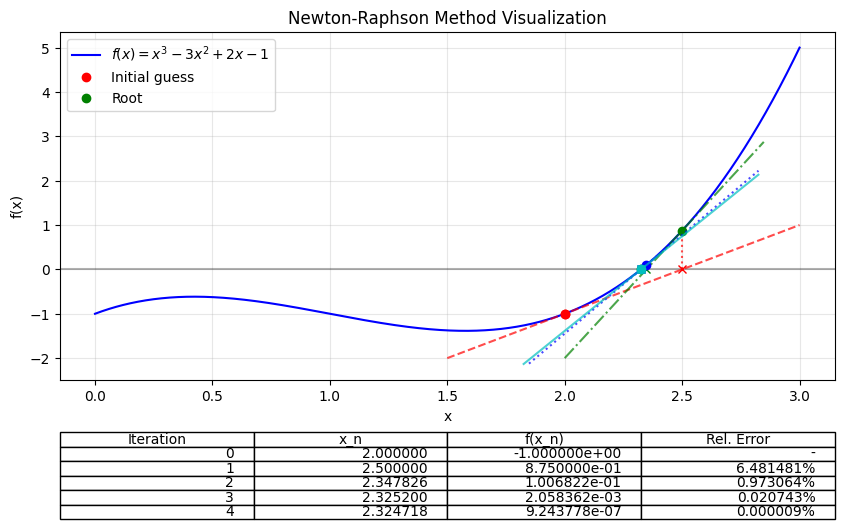

In [4]:
def visualize_newton_raphson(fun, dfdx, x_history):
    """Visualize the Newton-Raphson iteration process"""
    plt.figure(figsize=(10, 6))

    # Plot the function
    x = np.linspace(0, 3, 1000)
    y = [fun(xi) for xi in x]
    plt.plot(x, y, 'b-', label=r'$f(x) = x^3 - 3x^2 + 2x - 1$')
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)

    # Plot the initial guess
    plt.plot(x_history[0], fun(x_history[0]), 'ro', label='Initial guess')

    # Plot the final root
    plt.plot(x_history[-1], fun(x_history[-1]), 'go', label='Root')

    # Plot the iterations (first few for clarity)
    colors = ['r', 'g', 'b', 'c']
    linestyles = ['--', '-.', ':', '-']

    for i in range(min(len(x_history)-1, 4)):
        x_curr = x_history[i]
        y_curr = fun(x_curr)

        # Calculate tangent line
        slope = dfdx(x_curr)
        x_tangent = np.linspace(x_curr-0.5, x_history[i+1]+0.5, 100)
        y_tangent = [slope * (xi - x_curr) + y_curr for xi in x_tangent]

        # Plot tangent line and next guess
        plt.plot(x_tangent, y_tangent, color=colors[i % len(colors)],
                 linestyle=linestyles[i % len(linestyles)], alpha=0.7)
        plt.plot(x_curr, y_curr, 'o', color=colors[i % len(colors)])
        plt.plot(x_history[i+1], 0, 'x', color=colors[i % len(colors)])
        plt.plot([x_history[i+1], x_history[i+1]], [0, fun(x_history[i+1])],
                 color=colors[i % len(colors)], linestyle=':', alpha=0.7)

    # Add table showing iterations
    iteration_data = []
    for i, x_val in enumerate(x_history[:5]):  # Show first 5 iterations
        if i < len(x_history) - 1:
            ea = abs((x_history[i+1] - x_val) / x_history[i+1]) * 100
            iteration_data.append([i, f"{x_val:.6f}", f"{fun(x_val):.6e}",
                                   f"{ea:.6f}%" if i > 0 else "-"])

    columns = ['Iteration', 'x_n', 'f(x_n)', 'Rel. Error']
    plt.table(cellText=iteration_data, colLabels=columns,
              loc='bottom', bbox=[0.0, -0.40, 1.0, 0.25])

    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.title('Newton-Raphson Method Visualization')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.subplots_adjust(bottom=0.30)
    plt.show()

# Visualize the convergence process
visualize_newton_raphson(beam_equation, beam_derivative, x_history)

## Convergence Rate Analysis

Let's examine how quickly the method converges by plotting the error vs. iterations:

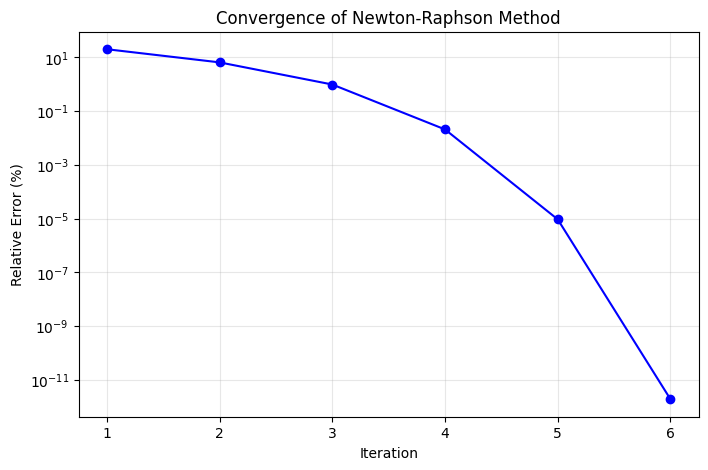

In [5]:
plt.figure(figsize=(8, 5))
plt.semilogy(range(1, len(ea_history) + 1), ea_history, 'bo-')
plt.grid(True, which="both", alpha=0.3)
plt.title('Convergence of Newton-Raphson Method')
plt.xlabel('Iteration')
plt.ylabel('Relative Error (%)')
plt.xticks(range(1, len(ea_history) + 1))
plt.show()

# Note the steep decline in error (logarithmic scale) - this demonstrates
# the quadratic convergence of the Newton-Raphson method

## Effect of Initial Guess

The Newton-Raphson method's success depends on the choice of initial guess. Let's explore this dependency:

Starting Point   Root Found    Iterations Final Error (%)
---------------------------------------------------------
   0.500000       2.324718         20        0.000000    
   1.500000       2.324718         21        0.000000    
   2.500000       2.324718         5         0.000000    


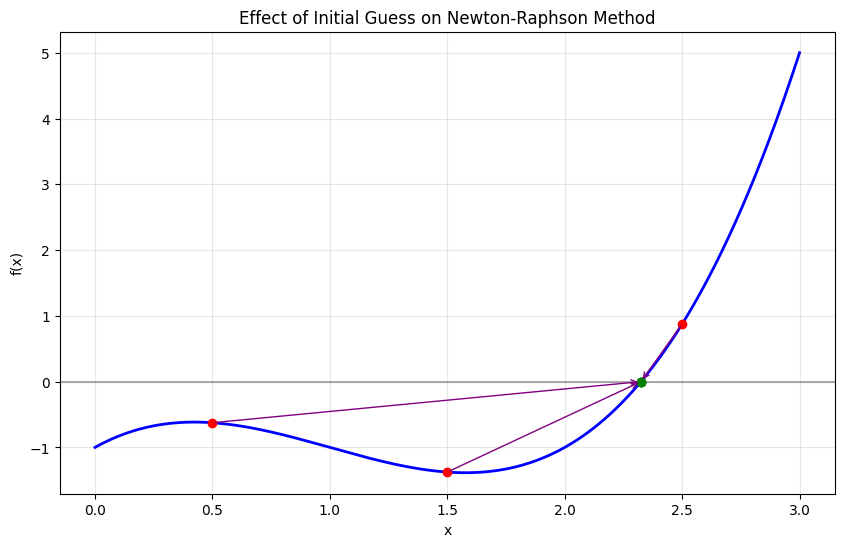

In [6]:
# Try different starting points
starting_points = [0.5, 1.5, 2.5]

# Plot the function
x_plot = np.linspace(0, 3, 1000)
y_plot = [beam_equation(xi) for xi in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', linewidth=2)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.title('Effect of Initial Guess on Newton-Raphson Method')
plt.xlabel('x')
plt.ylabel('f(x)')

# Solve from different starting points
print(f"{'Starting Point':^15}{'Root Found':^15}{'Iterations':^12}{'Final Error (%)':^15}")
print("-" * 57)

for x0 in starting_points:
    try:
        # Mark the starting point
        plt.plot(x0, beam_equation(x0), 'ro')

        # Find the root
        root, error, iterations, x_hist, ea_hist = newton_raphson(
            beam_equation, beam_derivative, x0
        )

        # Mark the found root
        plt.plot(root, beam_equation(root), 'go')

        # Draw arrow from start to root
        plt.annotate("",
                    xy=(root, beam_equation(root)),
                    xytext=(x0, beam_equation(x0)),
                    arrowprops=dict(arrowstyle="->", color="purple"))

        print(f"{x0:^15.6f}{root:^15.6f}{iterations:^12d}{error:^15.6f}")
    except ValueError as e:
        print(f"{x0:^15.6f}{'Failed':^15}{'-':^12}{'-':^15} - {e}")

plt.show()

## Limitations and Considerations

1. **Derivative Requirement**: Requires the derivative of the function
2. **Initial Guess Sensitivity**: Success depends on good initial approximation
3. **Convergence Issues**: Can fail if derivative is zero or near zero
4. **Single Root Finding**: Finds one root at a time



## Summary

- The Newton-Raphson method is a powerful technique for finding roots of nonlinear equations
- It uses the derivative of a function to iteratively improve approximations
- The method typically exhibits quadratic convergence when close to a root
- Initial guess selection is critical for successful convergence
- Many engineering problems require root-finding, making this an essential tool

